# Cars dataset

In [157]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance

### Duplicates and missing values

In [116]:
df = pd.read_csv("ML_Cars_dataset.csv")

In [117]:
df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
1,std,front,64.1,2548,dohc,four,2.68,5000,expensive
2,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
3,std,front,NaN,2337,ohc,four,3.40,5500,expensive
4,std,front,66.4,2824,ohc,five,3.40,5500,expensive


In [118]:
df.drop_duplicates(inplace=True)

In [119]:
df.isnull().sum().sort_values(ascending=False)/len(df)

enginelocation    0.052356
carwidth          0.010471
aspiration        0.000000
curbweight        0.000000
enginetype        0.000000
cylindernumber    0.000000
stroke            0.000000
peakrpm           0.000000
price             0.000000
dtype: float64

In [120]:
df["carwidth"].unique()        

array(['64.1', '65.5', nan, '66.4', '66.3', '71.4', '67.9', '64.8',
       '66.9', '70.9', '60.3', '*', '63.6', '63.8', '64.6', '63.9', '64',
       '65.2', '66', '61.8', '69.6', '70.6', '64.2', '65.7', '66.5',
       '66.1', '70.3', '71.7', '70.5', '72', '68', '64.4', '65.4', '68.4',
       '68.3', '65', '72.3', '66.6', '63.4', '65.6', '67.7', '67.2',
       '68.9', '68.8'], dtype=object)

In [121]:
df = df.replace("*", np.nan)

In [122]:
imputer = SimpleImputer(strategy="median")
imputer.fit_transform(df[["carwidth"]])
df["carwidth"] = imputer.transform(df[["carwidth"]])

In [123]:
df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
2,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
3,std,front,65.5,2337,ohc,four,3.40,5500,expensive
4,std,front,66.4,2824,ohc,five,3.40,5500,expensive
5,std,front,66.3,2507,ohc,five,3.40,5500,expensive


In [124]:
df["carwidth"].unique()        

array([64.1, 65.5, 66.4, 66.3, 71.4, 67.9, 64.8, 66.9, 70.9, 60.3, 63.6,
       63.8, 64.6, 63.9, 64. , 65.2, 66. , 61.8, 69.6, 70.6, 64.2, 65.7,
       66.5, 66.1, 70.3, 71.7, 70.5, 72. , 68. , 64.4, 65.4, 68.4, 68.3,
       65. , 72.3, 66.6, 63.4, 65.6, 67.7, 67.2, 68.9, 68.8])

In [125]:
df.isnull().sum().sort_values(ascending=False)/len(df)

enginelocation    0.052356
aspiration        0.000000
carwidth          0.000000
curbweight        0.000000
enginetype        0.000000
cylindernumber    0.000000
stroke            0.000000
peakrpm           0.000000
price             0.000000
dtype: float64

In [126]:
df.enginelocation.unique()

array(['front', nan, 'rear'], dtype=object)

In [127]:
df.enginelocation.value_counts()

front    179
rear       2
Name: enginelocation, dtype: int64

In [128]:
imputer_1 = SimpleImputer(strategy="most_frequent")
imputer_1.fit(df[["enginelocation"]])
df["enginelocation"] = imputer_1.transform(df[["enginelocation"]])

In [129]:
df.isnull().sum().sort_values(ascending=False)/len(df)

aspiration        0.0
enginelocation    0.0
carwidth          0.0
curbweight        0.0
enginetype        0.0
cylindernumber    0.0
stroke            0.0
peakrpm           0.0
price             0.0
dtype: float64

### Scaling

<AxesSubplot:ylabel='Frequency'>

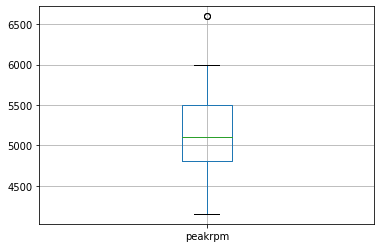

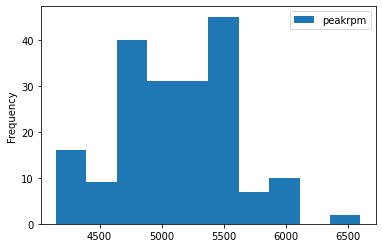

In [130]:
df[['peakrpm']].boxplot()
df[['peakrpm']].plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

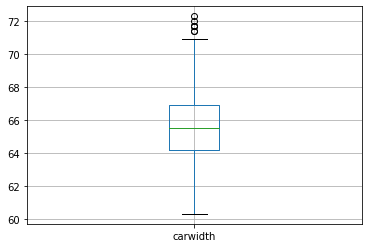

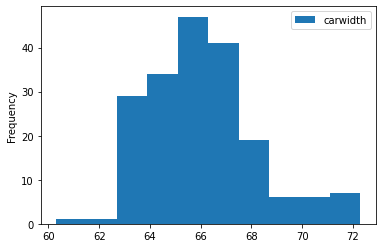

In [131]:
df[['carwidth']].boxplot()
df[['carwidth']].plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

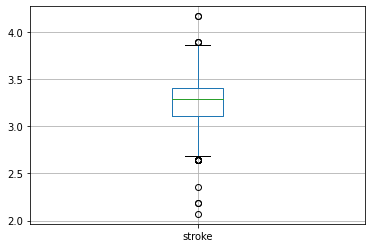

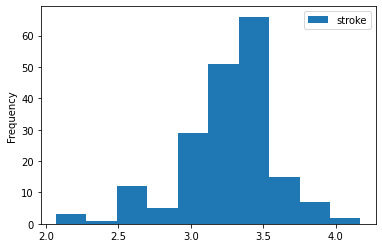

In [132]:
df[['stroke']].boxplot()
df[['stroke']].plot.hist(bins=10)

In [133]:
robustscaler = RobustScaler()
df["peakrpm"], df["stroke"], df['carwidth'] = robustscaler.fit_transform(df[["peakrpm", "stroke", "carwidth"]]).T
df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,-0.518519,2548,dohc,four,-2.033333,-0.142857,expensive
2,std,front,0.000000,2823,ohcv,six,0.600000,-0.142857,expensive
3,std,front,0.000000,2337,ohc,four,0.366667,0.571429,expensive
4,std,front,0.333333,2824,ohc,five,0.366667,0.571429,expensive
5,std,front,0.296296,2507,ohc,five,0.366667,0.571429,expensive


<AxesSubplot:ylabel='Frequency'>

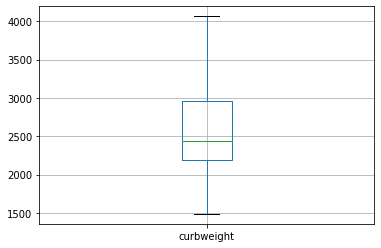

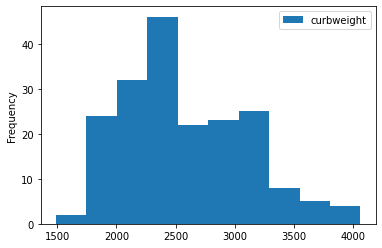

In [134]:
df[['curbweight']].boxplot()
df[['curbweight']].plot.hist(bins=10)

In [135]:
curb_scaler = StandardScaler()
curb_scaler.fit(df[["curbweight"]])
df["curbweight"] = curb_scaler.transform(df[["curbweight"]])

In [136]:
df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,-0.518519,-0.048068,dohc,four,-2.033333,-0.142857,expensive
2,std,front,0.000000,0.476395,ohcv,six,0.600000,-0.142857,expensive
3,std,front,0.000000,-0.450474,ohc,four,0.366667,0.571429,expensive
4,std,front,0.333333,0.478302,ohc,five,0.366667,0.571429,expensive
5,std,front,0.296296,-0.126260,ohc,five,0.366667,0.571429,expensive


### Encoding 

In [137]:
df["aspiration"].unique()

array(['std', 'turbo'], dtype=object)

In [138]:
df["enginelocation"].value_counts()

front    189
rear       2
Name: enginelocation, dtype: int64

In [139]:
bi_enc = OneHotEncoder(sparse=False, drop="first")
df["enginelocation"], df["aspiration"] = bi_enc.fit_transform(df[["enginelocation","aspiration"]]).T
df

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,0.0,0.0,-0.518519,-0.048068,dohc,four,-2.033333,-0.142857,expensive
2,0.0,0.0,0.000000,0.476395,ohcv,six,0.600000,-0.142857,expensive
3,0.0,0.0,0.000000,-0.450474,ohc,four,0.366667,0.571429,expensive
4,0.0,0.0,0.333333,0.478302,ohc,five,0.366667,0.571429,expensive
5,0.0,0.0,0.296296,-0.126260,ohc,five,0.366667,0.571429,expensive
...,...,...,...,...,...,...,...,...,...
200,0.0,0.0,1.259259,0.722416,ohc,four,-0.466667,0.428571,expensive
201,1.0,0.0,1.222222,0.907408,ohc,four,-0.466667,0.285714,expensive
202,0.0,0.0,1.259259,0.836844,ohcv,six,-1.400000,0.571429,expensive
203,1.0,0.0,1.259259,1.227807,ohc,six,0.366667,-0.428571,expensive


In [140]:
df.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [141]:
ohe = OneHotEncoder(sparse=False)
enginetype_ohe = ohe.fit_transform(df[["enginetype"]])
df['dohc'], df['dohcv'], df['l'], df['ohc'], df['ohcf'], df['ohcv'], df['rotor'] = enginetype_ohe.T
df.drop(columns="enginetype", inplace=True)

In [142]:
df.head()

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,0.0,0.0,-0.518519,-0.048068,four,-2.033333,-0.142857,expensive,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.476395,six,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.000000,-0.450474,four,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.333333,0.478302,five,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.296296,-0.126260,five,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [143]:
df.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [145]:
df.cylindernumber = df.cylindernumber.map({
    "four":4,
    "six":6,
    "five":5,
    "three":3,
    "twelve":12,
    "two":2,
    "eight":8
})

In [146]:
df.head()

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,0.0,0.0,-0.518519,-0.048068,4,-2.033333,-0.142857,expensive,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.476395,6,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.000000,-0.450474,4,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.333333,0.478302,5,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.296296,-0.126260,5,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [149]:
label_enc = LabelEncoder().fit_transform(df["price"])

### Features selection

<AxesSubplot:>

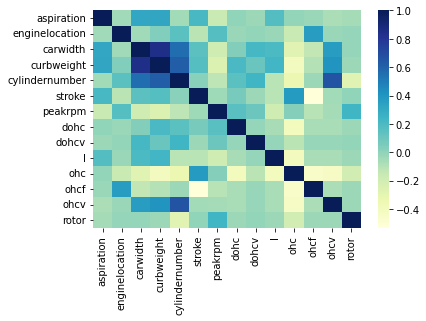

In [151]:
corr = df.corr() # Pearson Correlation

# Heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")

In [152]:
corr_df = corr.unstack().reset_index() # Unstack correlation matrix 

corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns

corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation

corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation

corr_df[(corr_df['correlation'] >= 0.5) | (corr_df['correlation'] <= -0.5)]

,feature_1,feature_2,correlation
44,curbweight,carwidth,0.847498
31,carwidth,curbweight,0.847498
68,cylindernumber,ohcv,0.659851
172,ohcv,cylindernumber,0.659851
46,curbweight,cylindernumber,0.620091
59,cylindernumber,curbweight,0.620091
32,carwidth,cylindernumber,0.552006
58,cylindernumber,carwidth,0.552006
159,ohcf,stroke,-0.534229
81,stroke,ohcf,-0.534229


In [154]:
df.drop(columns=['carwidth','ohcv','cylindernumber','ohcf'],inplace=True) # dropping the less granularity ones

### Base model

In [156]:
X = df.drop(columns=['price'])
y = df['price']

base_model = LogisticRegression()

score = cross_val_score(base_model, X, y, cv=10)

base_model_score = score.mean()

base_model_score

0.874736842105263

### Feature selection vol. 2

In [161]:
model = LogisticRegression().fit(X, y) # Fit model

permutation_score = permutation_importance(model, X, y, n_repeats=100) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) # Unstack results

importance_df.columns=['feature','feature importance']

importance_df.sort_values(by="feature importance", ascending = False) # Order by importance

,feature,feature importance
2,curbweight,0.405131
9,rotor,0.010785
0,aspiration,0.005026
4,peakrpm,0.003089
3,stroke,0.000052
1,enginelocation,0.0
5,dohc,0.0
6,dohcv,0.0
7,l,0.0
8,ohc,0.0


In [162]:
X = df.drop(columns=['price','stroke','dohc','dohcv',"l","ohc","enginelocation"])

In [165]:
model2 = LogisticRegression()

score = cross_val_score(model2, X, y, cv=10)

better_model_score = score.mean()

better_model_score

0.8852631578947369